# 🟥 1. Introduction

## Job Market Dataset — Exploratory Data Analysis (EDA)

This project analyzes a Job Market dataset to understand trends in job types, categories, required skills, salaries, 
and experience levels. 

### Goals
- Clean and prepare the dataset.
- Engineer new useful features (e.g., salary_avg, experience_level, num_skills).
- Explore trends in job types, categories, salaries, and experience levels.
- Extract actionable insights supported by visualizations.

The final cleaned dataset will be used for reporting, dashboarding, or as part of a Data Science portfolio project.

# 🟦 2. Importing Libraries

In [9]:
# Data processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

# Display formatting
from IPython.core.display import HTML
HTML("""
<style>
.dataframe table, .dataframe th, .dataframe td { font-size: 12px; }
div.output_scroll { overflow-x: auto; }
</style>
""")

# 🟩 3. Loading Dataset

In [21]:
df = pd.read_csv("job_market.csv")
df.head()

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
0,Engineering Manager,DataInc,"San Francisco, CA",Remote,Technology,151082,291345,4.0,2025-11-27,"AWS, Agile, Machine Learning, Kubernetes, Mong..."
1,Engineering Manager,EnterpriseHub,"New York, NY",Remote,Technology,156891,280075,3.0,2025-11-27,"Java, Agile, Git, SQL, Ruby, Go"
2,Engineering Manager,StartupXYZ,"Seattle, WA",Part-time,Technology,152134,280310,4.0,2025-11-27,"AWS, Python, Kubernetes, Git"
3,Lead Engineer,WebDynamics,"Seattle, WA",Full-time,Technology,151918,253988,7.0,2025-11-27,"Agile, Git, Docker, REST APIs, TypeScript"
4,Senior Software Engineer,DigitalWorks,"San Francisco, CA",Full-time,Technology,148141,252584,9.0,2025-11-27,"Agile, Ruby, Docker, Git, JavaScript"


### Quick Inspection
- Check dataset shape, info, and sample rows.
- Identify missing values or inconsistencies.

In [22]:
print("Dataset shape:", df.shape)
df.head()
df.info()
df.sample(5)

Dataset shape: (250, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_title            250 non-null    object 
 1   company              250 non-null    object 
 2   location             250 non-null    object 
 3   job_type             221 non-null    object 
 4   category             230 non-null    object 
 5   salary_min           250 non-null    int64  
 6   salary_max           250 non-null    int64  
 7   experience_required  207 non-null    float64
 8   publication_date     250 non-null    object 
 9   skills               200 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 19.7+ KB


,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
19,Engineering Manager,EnterpriseHub,"Denver, CO",Remote,Technology,116663,216465,2.0,2025-11-27,"React, REST APIs, Java, Docker, TypeScript, Ma..."
100,Security Engineer,StartupXYZ,"New York, NY",Contract,Technology,98214,176117,2.0,2025-11-27,"Git, Ruby, Machine Learning, Kubernetes, Agile..."
94,Account Manager,Paymentology,Berlin,Full time,Remote,100000,180000,7.0,1764214929,NaN
14,Engineering Manager,DigitalWorks,"Denver, CO",Part-time,Technology,124285,232235,3.0,2025-11-27,"AWS, Machine Learning, SQL, Go, TypeScript"
85,Marketing/Sales Manager (m/w/d),HHL Leipzig Graduate School of Management,Leipzig,NaN,Marketing and Communication,100000,180000,NaN,1764187339,NaN


# 🟨 4. Data Cleaning

## Fix publication_date

In [23]:
def fix_publication_date(v):
    v_str = str(v)
    if v_str.isdigit():
        return pd.to_datetime(int(v_str), unit='s', errors='coerce')
    else:
        return pd.to_datetime(v_str, errors='coerce')

df['publication_date'] = df['publication_date'].apply(fix_publication_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   job_title            250 non-null    object        
 1   company              250 non-null    object        
 2   location             250 non-null    object        
 3   job_type             221 non-null    object        
 4   category             230 non-null    object        
 5   salary_min           250 non-null    int64         
 6   salary_max           250 non-null    int64         
 7   experience_required  207 non-null    float64       
 8   publication_date     250 non-null    datetime64[ns]
 9   skills               200 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 19.7+ KB


**Note:** We cleaned the 'publication_date' column to ensure all dates are in a consistent datetime format. \
Unix timestamps (numeric values) were converted to datetime, and any non-standard date strings were also parsed. \
This allows for accurate date-based analysis and avoids errors in plotting or filtering by date.

In [24]:
df.sample(5)

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
75,Frontend Developer,WebDynamics,"New York, NY",Remote,Technology,109745,178290,4.0,2025-11-27 00:00:00,"Go, MongoDB, CI/CD, Machine Learning, Agile, Java"
240,UX Designer,TechCorp,"Chicago, IL",Contract,Technology,53114,103673,5.0,2025-11-27 00:00:00,"SQL, MongoDB, Ruby, AWS"
101,Product Manager,CodeFactory,"Denver, CO",Contract,Technology,97454,171881,4.0,2025-11-27 00:00:00,"Machine Learning, Git, REST APIs, Node.js"
236,Fleet Operations Driver,Bolt Technology,"Bremen, Bremen, Germany",NaN,NaN,60000,100000,NaN,2025-11-26 21:45:13,NaN
141,Data Scientist,CloudSystems,"Austin, TX",Part-time,Technology,74350,150171,5.0,2025-11-27 00:00:00,"MongoDB, Node.js, REST APIs"


In [25]:
df['publication_date'] = df['publication_date'].dt.normalize()

**Note:** We normalized the 'publication_date' column to remove the time component. \
For example, '2025-11-27 07:45:12' becomes '2025-11-27'. \
This ensures that only the date is considered, which is useful for daily-level analysis and aggregation.

In [26]:
df.sample(5)

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
65,Machine Learning Engineer,DataInc,"New York, NY",Remote,Technology,106755,186095,2.0,2025-11-27,"Agile, REST APIs, AWS, Git, Machine Learning, ..."
42,Technical Lead,DigitalWorks,"Seattle, WA",Part-time,Technology,109758,190478,7.0,2025-11-27,"SQL, TensorFlow, Node.js, Git, AWS"
127,Software Engineer,StartupXYZ,"Toronto, Canada",Remote,Technology,89594,142259,3.0,2025-11-27,"Agile, Java, Git, Docker"
92,Marketplace & E-Commerce Manager (m/w/d),fleeky GmbH,Hamburg,berufserfahren,Marketing and Communication,100000,180000,NaN,2025-11-26,NaN
5,Senior Software Engineer,WebDynamics,"Seattle, WA",Part-time,Technology,147870,248059,8.0,2025-11-27,"CI/CD, Python, Kubernetes, JavaScript, SQL, Do..."


## Clean job_type

In [27]:
df.isna().sum()

job_title               0
company                 0
location                0
job_type               29
category               20
salary_min              0
salary_max              0
experience_required    43
publication_date        0
skills                 50
dtype: int64

In [28]:
df['job_type'].value_counts()

job_type
Remote                        55
Full-time                     50
Contract                      50
Part-time                     49
berufserfahren                 6
Full time                      3
Working student                3
professional / experienced     2
manager                        1
Internship                     1
berufseinstieg                 1
Name: count, dtype: int64

In [29]:
df['job_type'] = df['job_type'].str.lower().str.replace('-', ' ').str.replace('/', ' ').str.strip()
job_type_mapping = {
    'full time': 'full-time', 'full-time': 'full-time', 'remote': 'remote',
    'contract': 'contract', 'part time': 'part-time', 'part-time': 'part-time',
    'working student': 'working student', 'professional   experienced': 'professional / experienced',
    'manager': 'manager', 'internship': 'internship', 'berufserfahren': 'experienced',
    'berufseinstieg': 'entry-level'
}
df['job_type'] = df['job_type'].replace(job_type_mapping)

**Note:** We standardized the 'job_type' column to ensure consistency. \
This involved converting all text to lowercase, replacing '-' and '/' with spaces, trimming extra spaces, \
and mapping similar job types (e.g., 'full time' and 'full-time') to a single standardized label. \
This helps avoid duplicate categories and ensures accurate analysis of job types.

In [30]:
df['job_type'].value_counts()

job_type
remote                        55
full-time                     53
contract                      50
part-time                     49
experienced                    6
working student                3
professional / experienced     2
manager                        1
internship                     1
entry-level                    1
Name: count, dtype: int64

## Handle Remote jobs in category

In [31]:
df['category'].value_counts()

category
Technology                     200
Remote                          11
Marketing and Communication      6
Software Development             4
Social Media Manager             2
Recruitment and Selection        1
SAP/ERP Consulting               1
Helpdesk                         1
Media Planning                   1
Finance                          1
Process Engineering              1
HR                               1
Name: count, dtype: int64

In [32]:
df.loc[df['category'] == 'Remote', ['job_type', 'category']]

,job_type,category
46,full-time,Remote
86,experienced,Remote
88,full-time,Remote
89,full-time,Remote
90,full-time,Remote
93,full-time,Remote
94,full-time,Remote
109,NaN,Remote
210,working student,Remote
247,NaN,Remote


**Note:**
- Checking rows where 'category' is 'Remote' to verify if the value is in the correct column.
- This helps us see whether 'Remote' should belong to 'job_type' instead of 'category'.

In [33]:
df.loc[(df['job_type'].isna()) & (df['category'] == 'Remote'), 'job_type'] = 'remote'
df.loc[df['category'] == 'Remote', 'category'] = 'Unknown'

**Note:**
- We reassigned 'Remote' to the correct column:
- If 'job_type' was missing and 'category' had 'Remote', we set 'job_type' to 'remote'.
- Then we replaced 'Remote' in 'category' with 'Unknown' to keep categories clean and consistent.

In [34]:
df.isna().sum()

job_title               0
company                 0
location                0
job_type               26
category               20
salary_min              0
salary_max              0
experience_required    43
publication_date        0
skills                 50
dtype: int64

In [35]:
df[df['category'].isna()]

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
44,Senior Android Engineer,Bolt Technology,"Berlin, Berlin, Germany",NaN,NaN,110000,190000,NaN,2025-11-26,NaN
45,Staff Data Platform Engineer (f/m/d),Apaleo,"Munich, Bavaria, Germany",NaN,NaN,110000,190000,NaN,2025-11-27,NaN
96,Regional Restaurant Marketing Manager (North a...,Wolt - English,"Hamburg, Hamburg, Germany",NaN,NaN,100000,180000,NaN,2025-11-27,NaN
110,"Analytics Lead, Operations",SumUp,"Berlin, Berlin, Germany",NaN,NaN,90000,150000,NaN,2025-11-26,NaN
217,Fachkraft für Lebensmitteltechnik (Mitarbeiter...,Flora Food Group,"Kleve, North Rhine-Westphalia, Germany",NaN,NaN,60000,100000,NaN,2025-11-26,NaN
220,Scooter Mechanic,Bolt Technology,"Kassel, Hesse, Germany",NaN,NaN,60000,100000,NaN,2025-11-26,NaN
221,Scooter Mechanic,Bolt Technology,"Bielefeld, North Rhine-Westphalia, Germany",NaN,NaN,60000,100000,NaN,2025-11-26,NaN
222,Scooter Mechanic,Bolt Technology,"Nuremberg, Bavaria, Germany",NaN,NaN,60000,100000,NaN,2025-11-26,NaN
224,Post-Onboarding Success Specialist,Wolt - English,"Hannoversche Straße, Lower Saxony, Germany",NaN,NaN,60000,100000,NaN,2025-11-27,NaN
225,Scooter Mechanic,Bolt Technology,"Augsburg, Bavaria, Germany",NaN,NaN,60000,100000,NaN,2025-11-26,NaN


In [36]:
df['category'].value_counts()

category
Technology                     200
Unknown                         11
Marketing and Communication      6
Software Development             4
Social Media Manager             2
Recruitment and Selection        1
SAP/ERP Consulting               1
Helpdesk                         1
Media Planning                   1
Finance                          1
Process Engineering              1
HR                               1
Name: count, dtype: int64

## Translate German job titles to English

In [37]:
df['job_title'].value_counts()

job_title
Machine Learning Engineer                                                                                                            14
Solutions Architect                                                                                                                  13
Software Engineer                                                                                                                    13
Technical Lead                                                                                                                       13
Senior Software Engineer                                                                                                             12
Scooter Mechanic                                                                                                                     11
Project Manager                                                                                                                      10
Business Analyst                      

In [38]:
def translate_german_title(title):
    translations = {
        'werkstudent': 'working student', 'praktikum': 'internship', 'schwerpunkt': 'focus',
        'beratung': 'consulting', 'fachkraft': 'specialist', 'lebensmitteltechnik': 'food technology',
        'mitarbeiter im prozessbereich': 'process staff', 'standortanalyse': 'location analysis',
        'pps-optimierung': 'pps optimization', 'projektingenieur': 'project engineer',
        'wasserver- und entsorgung': 'water supply and disposal',
        'abrechnung/faktura schadenmanagement': 'billing / claims management',
        'webentwicklung': 'web development', 'testautomatisierer': 'test automation engineer',
        'softwareentwickler': 'software developer', 'senior finanzbuchhalter':'senior financial accountant'
    }
    title_lower = title.lower()
    for german, english in translations.items():
        title_lower = title_lower.replace(german, english)
    return title_lower

df['job_title'] = df['job_title'].apply(translate_german_title)

**Note:**
- We translated common German keywords in job titles into English.
- This standardizes the 'job_title' column and makes the dataset easier to analyze.
- The function replaces known German terms (e.g., "werkstudent", "praktikum")
- with their English equivalents (e.g., "working student", "internship") before saving the cleaned title.

## Fill missing categories based on keywords

In [39]:
df.loc[(df['category'] == 'Unknown') | (pd.isna(df['category'])), ['job_title', 'category']]

,job_title,category
44,senior android engineer,NaN
45,staff data platform engineer (f/m/d),NaN
46,senior solutions architect,Unknown
86,seo account manager:in (m/w/d),Unknown
88,account manager,Unknown
89,technical account manager - dach,Unknown
90,technical account manager - dach,Unknown
93,account manager,Unknown
94,account manager,Unknown
96,regional restaurant marketing manager (north a...,NaN


**Note:**
- We displayed 'job_title' and 'category' for rows where the category was 'Unknown' or missing.
- This helps us manually review these jobs and assign the correct category instead of keeping NaN or 'Unknown'.

In [40]:
category_mapping = {
    'developer': 'Software Development', 'software engineer': 'Software Development', 'full stack': 'Software Development',
    'frontend': 'Software Development', 'backend': 'Software Development', 'qa': 'Technology', 'devops': 'Technology',
    'engineer': 'Technology', 'data scientist': 'Technology', 'machine learning': 'Technology', 'android': 'Technology',
    'solutions architect': 'Technology', 'technical lead': 'Technology', 'project manager': 'Technology',
    'product manager': 'Technology', 'analytics': 'Technology', 'security': 'Technology',
    'technical account manager': 'Technology', 'marketing': 'Marketing and Communication',
    'seo': 'Marketing and Communication', 'social media': 'Marketing and Communication',
    'account manager': 'Marketing and Communication', 'regional restaurant marketing': 'Marketing and Communication',
    'ppc': 'Marketing and Communication', 'working student': 'Working Student', 'internship': 'Internship',
    'sap': 'SAP/ERP Consulting', 'food technology': 'Process Engineering', 'hr': 'HR',
    'post-onboarding': 'HR', 'scooter mechanic': 'Process Engineering', 'fleet operations driver': 'Process Engineering',
    'senior financial accountant': 'Finance'
}

def fill_category(row):
    if pd.isna(row['category']) or row['category'] == 'Unknown':
        title = row['job_title'].lower()
        for key, value in category_mapping.items():
            if key in title:
                return value
        return 'Unknown'
    else:
        return row['category']

df['category'] = df.apply(fill_category, axis=1)
df['category'] = df['category'].fillna('Unknown')

**Note:**
- We assigned proper categories to jobs that had missing or 'Unknown' values.
- The logic checks the job title for specific keywords and maps them to the right category.
- If no keyword is found, the category stays as 'Unknown'.

In [41]:
df.isna().sum()

job_title               0
company                 0
location                0
job_type               26
category                0
salary_min              0
salary_max              0
experience_required    43
publication_date        0
skills                 50
dtype: int64

## Fill missing job_type

In [42]:
df[df['job_type'].isna()]

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
44,senior android engineer,Bolt Technology,"Berlin, Berlin, Germany",NaN,Technology,110000,190000,NaN,2025-11-26,NaN
45,staff data platform engineer (f/m/d),Apaleo,"Munich, Bavaria, Germany",NaN,Technology,110000,190000,NaN,2025-11-27,NaN
85,marketing/sales manager (m/w/d),HHL Leipzig Graduate School of Management,Leipzig,NaN,Marketing and Communication,100000,180000,NaN,2025-11-26,NaN
96,regional restaurant marketing manager (north a...,Wolt - English,"Hamburg, Hamburg, Germany",NaN,Marketing and Communication,100000,180000,NaN,2025-11-27,NaN
110,"analytics lead, operations",SumUp,"Berlin, Berlin, Germany",NaN,Technology,90000,150000,NaN,2025-11-26,NaN
159,forward deployed engineer (m/f/d),Elucidate GmbH,Berlin,NaN,Software Development,80000,140000,NaN,2025-11-27,NaN
211,** sap consultant - focus security-consulting **,OREXES GmbH,Fulda,NaN,SAP/ERP Consulting,60000,100000,NaN,2025-11-27,NaN
215,sachbearbeiter (m/w/d) billing / claims manage...,Fahrzeug-Werke LUEG AG,Essen,NaN,Finance,60000,100000,NaN,2025-11-27,NaN
217,specialist für food technology (process staff)...,Flora Food Group,"Kleve, North Rhine-Westphalia, Germany",NaN,Process Engineering,60000,100000,NaN,2025-11-26,NaN
218,project engineer water supply and disposal (m/...,Wilhelm Unternehmensberatung,Munich,NaN,Process Engineering,60000,100000,NaN,2025-11-26,NaN


In [43]:
df['job_type'] = df['job_type'].fillna('Unknown')

**Note:**
- We filled missing values in 'job_type' with 'Unknown' to keep the column complete and consistent.

## Fill missing experience_required

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   job_title            250 non-null    object        
 1   company              250 non-null    object        
 2   location             250 non-null    object        
 3   job_type             250 non-null    object        
 4   category             250 non-null    object        
 5   salary_min           250 non-null    int64         
 6   salary_max           250 non-null    int64         
 7   experience_required  207 non-null    float64       
 8   publication_date     250 non-null    datetime64[ns]
 9   skills               200 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 19.7+ KB


In [45]:
median_by_title = df.groupby('job_title')['experience_required'].median()
def fill_exp(row):
    if pd.notna(row['experience_required']):
        return row['experience_required']
    title_median = median_by_title.get(row['job_title'])
    if pd.notna(title_median):
        return title_median
    return df['experience_required'].median()

df['experience_required'] = df.apply(fill_exp, axis=1)
df['skills'] = df['skills'].fillna('None')

**Note:**
- We filled missing 'experience_required' values using a smart approach:
- If the job title has a median experience value, we use that.
- Otherwise, we fall back to the overall median.
- This gives more realistic estimates than leaving values empty.
- We also replaced missing 'skills' with 'None' to keep the column consistent.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   job_title            250 non-null    object        
 1   company              250 non-null    object        
 2   location             250 non-null    object        
 3   job_type             250 non-null    object        
 4   category             250 non-null    object        
 5   salary_min           250 non-null    int64         
 6   salary_max           250 non-null    int64         
 7   experience_required  250 non-null    float64       
 8   publication_date     250 non-null    datetime64[ns]
 9   skills               250 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 19.7+ KB


## Remove duplicates

In [47]:
df.duplicated().sum()

np.int64(1)

In [48]:
df[df.duplicated(keep=False)]

,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
88,account manager,Paymentology,Berlin,full-time,Marketing and Communication,100000,180000,7.0,2025-11-26,None
93,account manager,Paymentology,Berlin,full-time,Marketing and Communication,100000,180000,7.0,2025-11-26,None


In [49]:
df = df.drop_duplicates(keep='first')
df.shape

(249, 10)

**Note:**
- We removed duplicate rows to keep only the first occurrence of each entry.
- This ensures the dataset is clean and free of repeated records.

# 🟪 5. Feature Engineering

In [50]:
df['salary_range'] = df['salary_max'] - df['salary_min']
df['salary_avg'] = (df['salary_max'] + df['salary_min']) / 2

**Note:** We created two new features for salary analysis:
- 'salary_range': the difference between maximum and minimum salary, to see the salary spread.
- 'salary_avg': the average of minimum and maximum salary, to represent a typical salary for each job.
- These features make it easier to analyze salary distributions and compare jobs.

In [51]:
bins = [-0.1, 1, 3, 5, 10, 100]  # -0.1 up to 1 to include 0.0
labels = ['Beginner', 'Junior', 'Mid-level', 'Senior', 'Expert']
df['experience_level'] = pd.cut(df['experience_required'], bins=bins, labels=labels)

**Note:** We categorized 'experience_required' into experience levels using bins:
'0-1', '2-3', '4-5', '6-10', '10+' years.
This simplifies analysis by grouping jobs into meaningful experience ranges,
  making it easier to compare trends and visualize distribution of job openings by experience.

In [52]:
df['num_skills'] = df['skills'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

**Note:** We calculated 'num_skills' by counting the number of skills listed for each job.
      This feature helps analyze the relationship between skill requirements and other factors like salary or job category,
      and provides insight into the skill depth demanded by different roles.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 249
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   job_title            249 non-null    object        
 1   company              249 non-null    object        
 2   location             249 non-null    object        
 3   job_type             249 non-null    object        
 4   category             249 non-null    object        
 5   salary_min           249 non-null    int64         
 6   salary_max           249 non-null    int64         
 7   experience_required  249 non-null    float64       
 8   publication_date     249 non-null    datetime64[ns]
 9   skills               249 non-null    object        
 10  salary_range         249 non-null    int64         
 11  salary_avg           249 non-null    float64       
 12  experience_level     249 non-null    category      
 13  num_skills           249 non-null    int

# 🟧 6. Exploratory Data Analysis (EDA)

## Distribution of job categories

C:\Users\qusay\AppData\Local\Temp\ipykernel_11812\2393515763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')


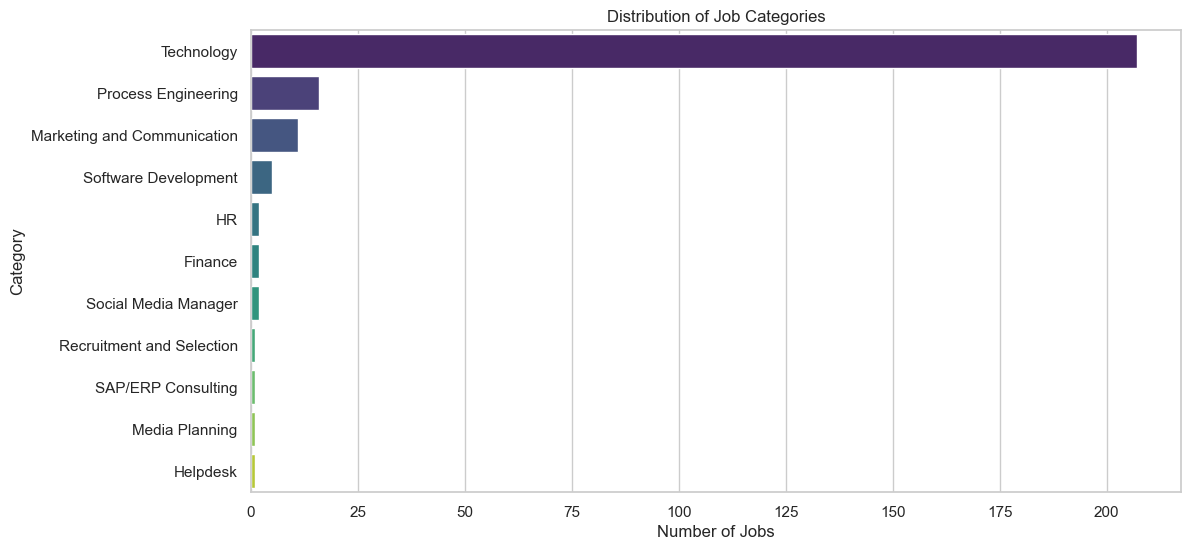

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')
plt.title("Distribution of Job Categories")
plt.xlabel("Number of Jobs")
plt.ylabel("Category")
plt.show()

**Insight:** Software Development and Technology dominate the job market. Other categories like HR and Finance are less frequent.

## Average salary by category

C:\Users\qusay\AppData\Local\Temp\ipykernel_11812\3574982644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_salary.values, y=category_salary.index, palette='coolwarm')


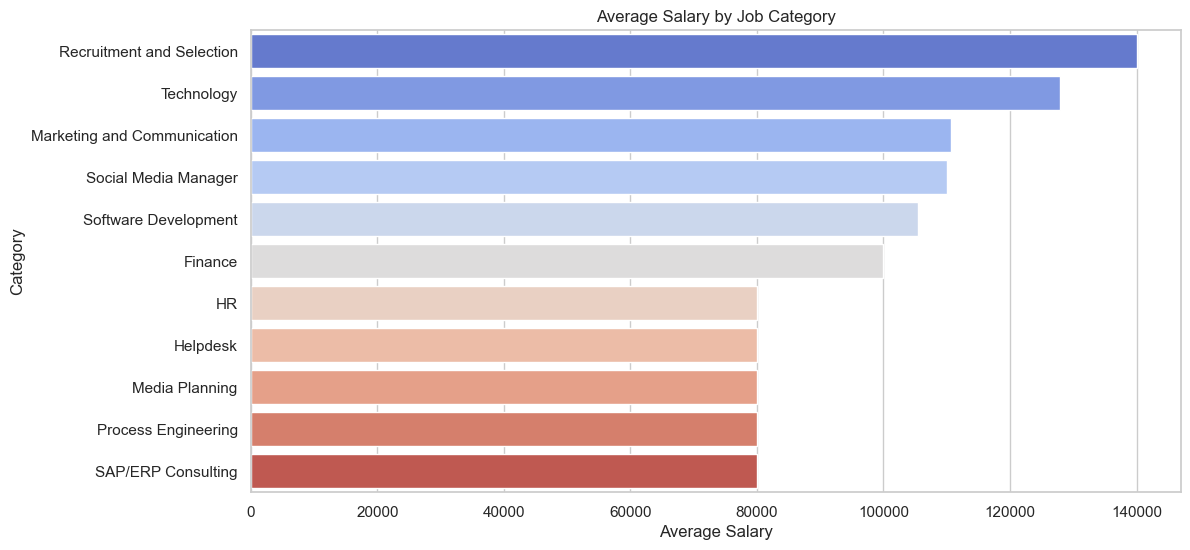

In [55]:
plt.figure(figsize=(12,6))
category_salary = df.groupby('category')['salary_avg'].mean().sort_values(ascending=False)
sns.barplot(x=category_salary.values, y=category_salary.index, palette='coolwarm')
plt.title("Average Salary by Job Category")
plt.xlabel("Average Salary")
plt.ylabel("Category")
plt.show()

**Insight:** Technology and Software Development roles tend to offer higher average salaries compared to other categories.

## Experience level distribution

C:\Users\qusay\AppData\Local\Temp\ipykernel_11812\340741165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience_level', data=df, palette='magma')


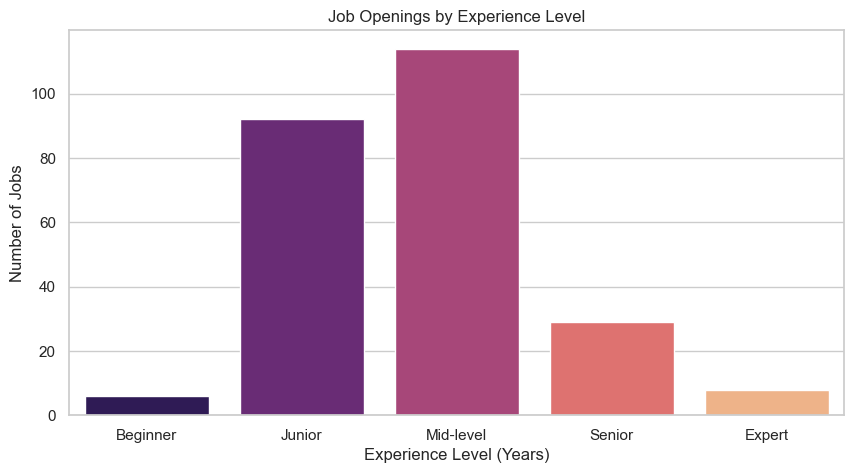

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x='experience_level', data=df, palette='magma')
plt.title("Job Openings by Experience Level")
plt.xlabel("Experience Level (Years)")
plt.ylabel("Number of Jobs")
plt.show()

**Insight:** Most jobs require 2-5 years of experience. Senior positions (10+ years) are less common.

## Skills count vs. salary_avg

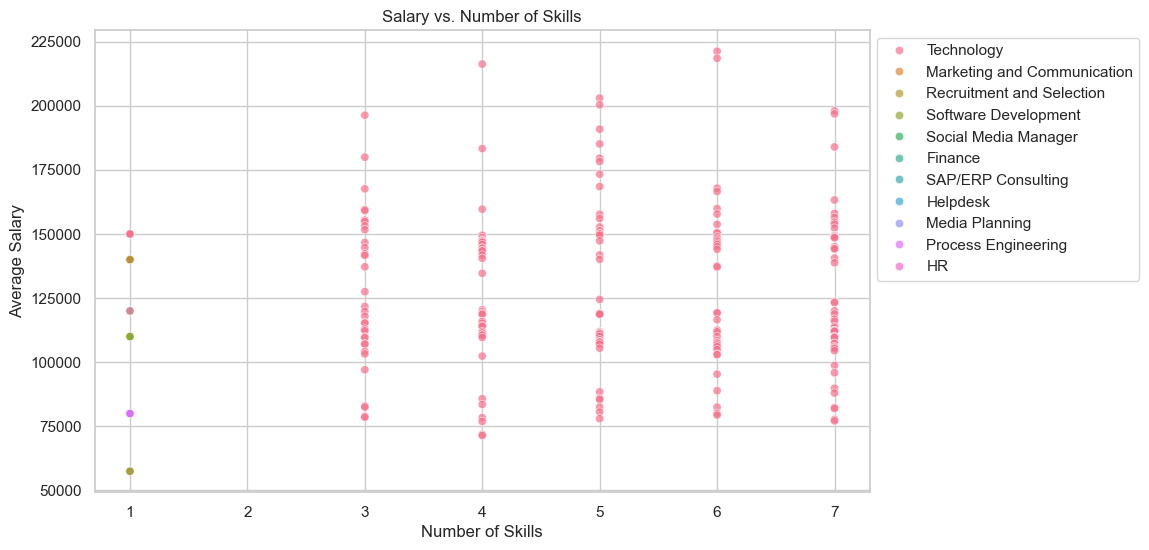

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_skills', y='salary_avg', data=df, hue='category', alpha=0.7)
plt.title("Salary vs. Number of Skills")
plt.xlabel("Number of Skills")
plt.ylabel("Average Salary")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Insight:** Jobs requiring more skills tend to have higher salaries, indicating skill depth is valued in the market.

# 🟫 7. Export Final Clean Dataset

In [58]:
df.to_csv("job_market_cleaned.csv", index=False)

# 🟦 8. Summary of Key Insights
## Summary of Insights

- Software Development and Technology categories dominate the market.
- Higher experience levels correlate with higher salaries, but such positions are less frequent.
- Number of skills positively impacts the average salary.
- HR, Finance, and niche categories are less represented in the dataset.
- Dataset cleaned, missing values filled, duplicates removed, and categories normalized. Ready for further analysis or modeling.